# Twitter Sentiment Analysis

A project to learn more about Sentiment Analysis. Key things to learn in this project is EDA's role in Sentiment Analysis, NLP, Cleaning data for puncutation and stopwords for more accurate analysis, count vectorization (Tokenization), and Naive Bayers Theory.

## Importing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tweets = pd.read_csv('twitter.csv')

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
tweets.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [5]:
tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Id is just the index + 1, so we can just drop the column. 

In [6]:
tweets = tweets.drop('id', axis=1)

In [7]:
tweets.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


## Data Exploration

In [8]:
tweets.isnull().sum()

label    0
tweet    0
dtype: int64

There seems to be no null values in our dataset. We will then move on to visualizing our data.

array([[<AxesSubplot: title={'center': 'label'}>]], dtype=object)

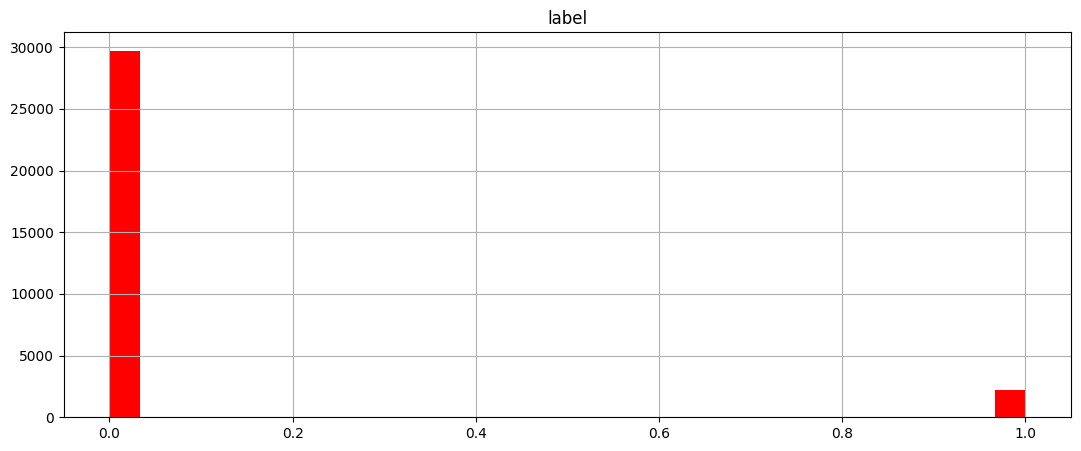

In [9]:
tweets.hist(bins = 30, figsize = (13,5), color = 'r')

<AxesSubplot: xlabel='label', ylabel='count'>

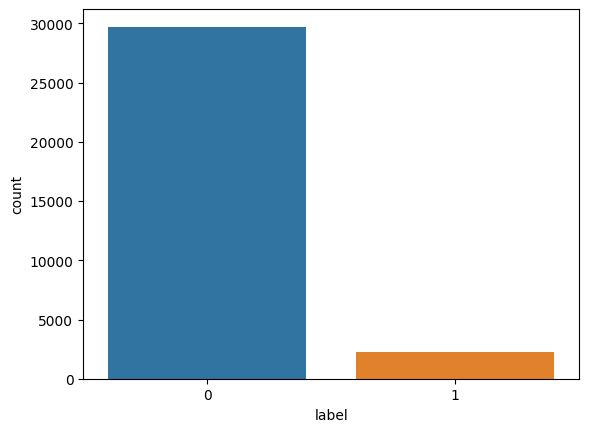

In [10]:
sns.countplot(data=tweets, x='label') 

We see that there are a lot of 0s in our label column, indicating that they are positive tweets, compared to the 1s, which indicates negative tweets. This is pretty unbalanced, but to fix this we would need a lot more tweets.

In [11]:
tweets['length'] = tweets['tweet'].apply(len)

In [12]:
tweets.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [13]:
tweets[tweets['length'] == 11]['tweet']

25195    i love you 
Name: tweet, dtype: object

<AxesSubplot: ylabel='Frequency'>

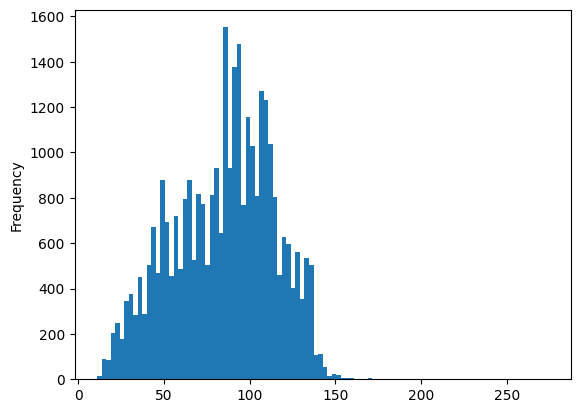

In [14]:
tweets['length'].plot(bins=100, kind='hist') 

We now see the distribution of the tweet length, which is extremely close to a bell shape curve, albeit a little skewed to the right. We will now see the word cloud of our tweets.

# Word Cloud

In [16]:
positive = tweets[tweets['label'] == 0]
sentences = tweets['tweet'].tolist()
sentences_as_one_string =" ".join(sentences)

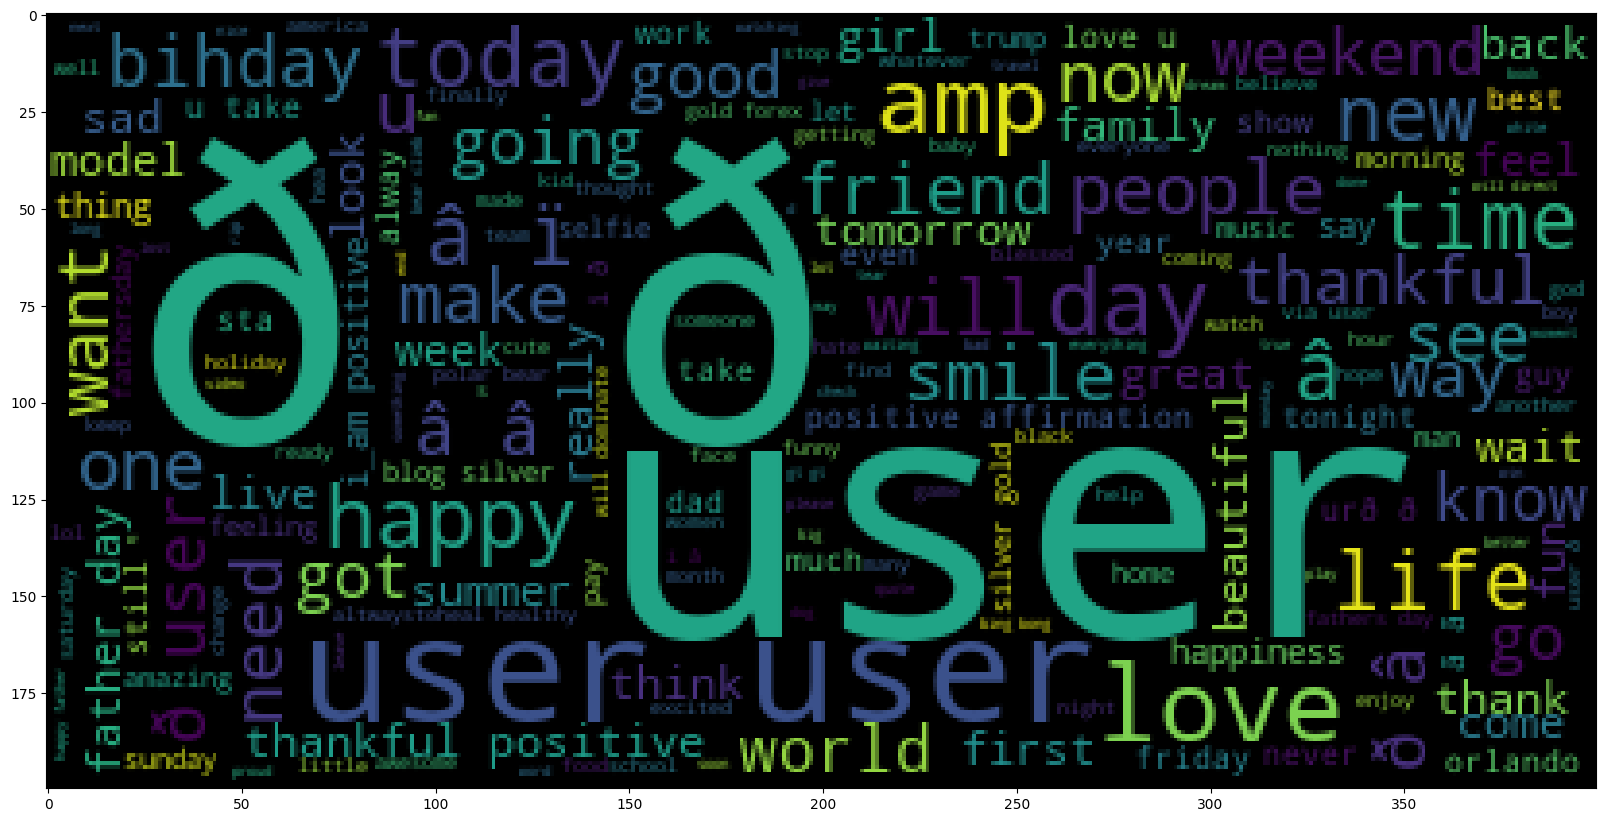

In [17]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [18]:
negative = tweets[tweets['label'] == 1]
sentences = tweets['tweet'].tolist()
sentences_as_one_string =" ".join(sentences)

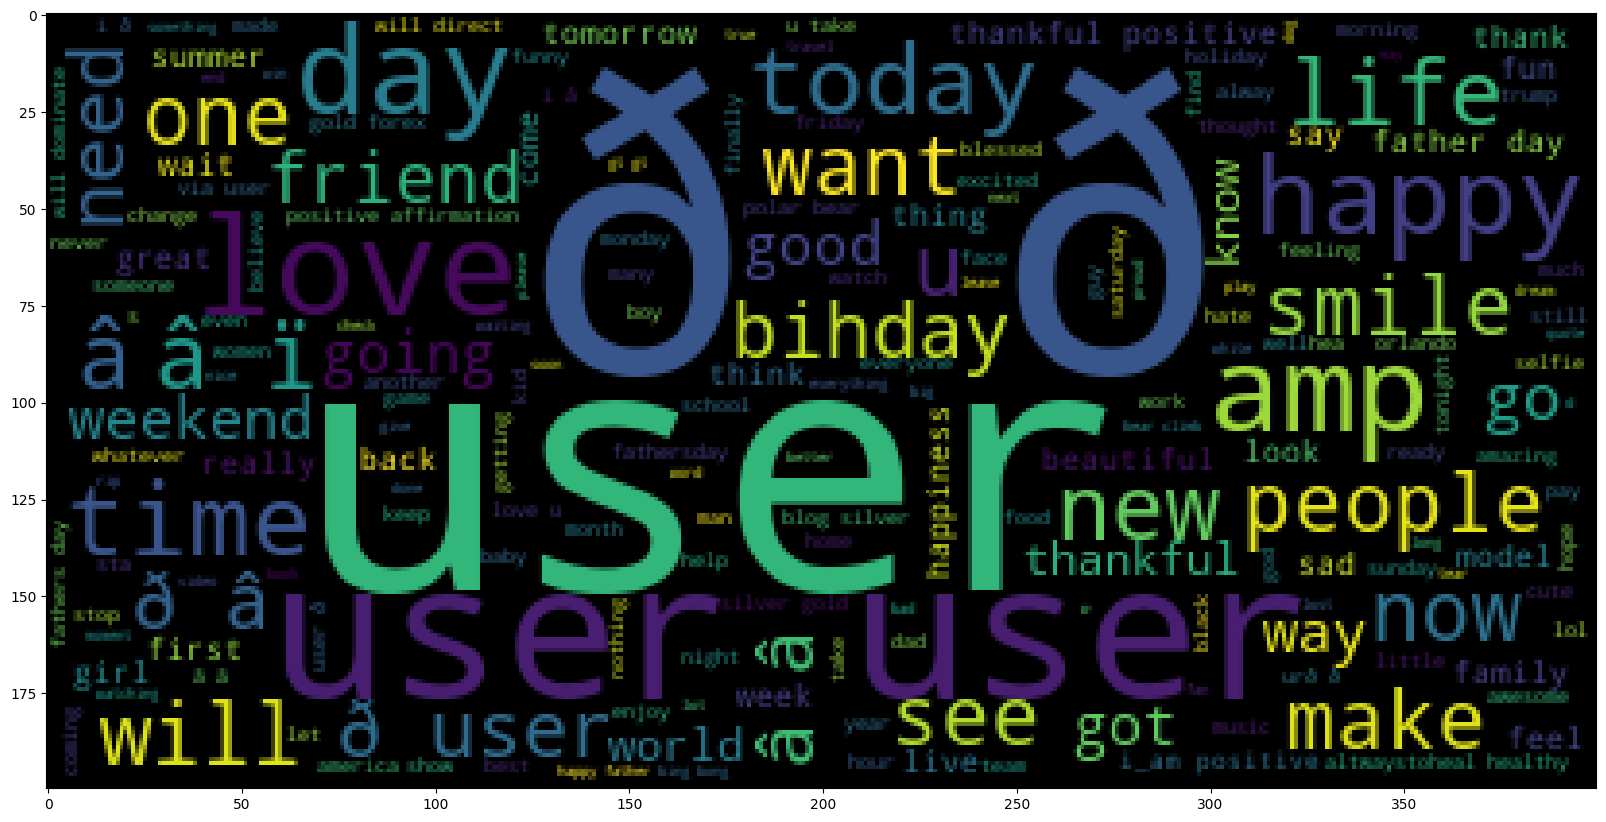

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

## Cleaning of Tweets

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [23]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\myron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
def cleaned_message(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed = ''.join(punc_removed)

    stop_removed = [word for word in punc_removed.split() if word.lower() not in stopwords.words('english')]
    return stop_removed

In [30]:
cleaned = tweets['tweet'].apply(cleaned_message)

In [26]:
cleaned

,label,tweet,length,Cleaned
0,0,@user when a father is dysfunctional and is s...,102,"[user, father, dysfunctional, selfish, drags, ..."
1,0,@user @user thanks for #lyft credit i can't us...,122,"[user, user, thanks, lyft, credit, cant, use, ..."
2,0,bihday your majesty,21,"[bihday, majesty]"
3,0,#model i love u take with u all the time in ...,86,"[model, love, u, take, u, time, urð±, ðð..."
4,0,factsguide: society now #motivation,39,"[factsguide, society, motivation]"
...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68,"[ate, user, isz, youuuðððððð..."
31958,0,to see nina turner on the airwaves trying to...,131,"[see, nina, turner, airwaves, trying, wrap, ma..."
31959,0,listening to sad songs on a monday morning otw...,63,"[listening, sad, songs, monday, morning, otw, ..."
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67,"[user, sikh, temple, vandalised, calgary, wso,..."


## Count Vectoriziation (Tokenization)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = cleaned_message, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets['tweet'])

In [33]:
print(vectorizer.get_feature_names_out())

['0' '0000001' '00027' ... 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86'
 'ó¾°\x80ó¾°\x80ó¾°\x80']


In [34]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
tweets_countvectorizer.shape

(31962, 47386)

In [36]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [37]:
X

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y = tweets['label']

## Training of Naive Bayers Model

In [40]:
X.shape

(31962, 47386)

In [41]:
y.shape

(31962,)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

## Predicting of test result

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot: >

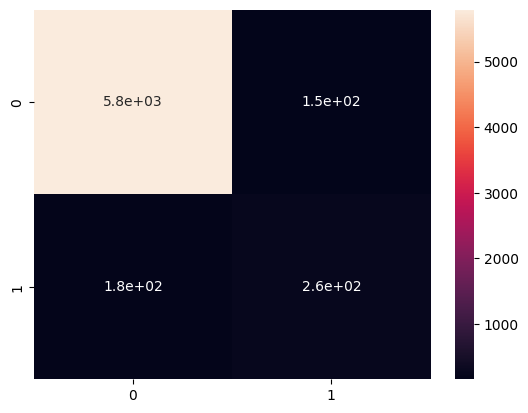

In [45]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [46]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5947
           1       0.63      0.59      0.61       446

    accuracy                           0.95      6393
   macro avg       0.80      0.78      0.79      6393
weighted avg       0.95      0.95      0.95      6393

